EDA

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Superstore - Sales Database.csv")

print(df.info())  # Overview of dataset
print(df.describe())  # Summary statistics for numerical columns
print(df.isnull().sum())  # Check missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

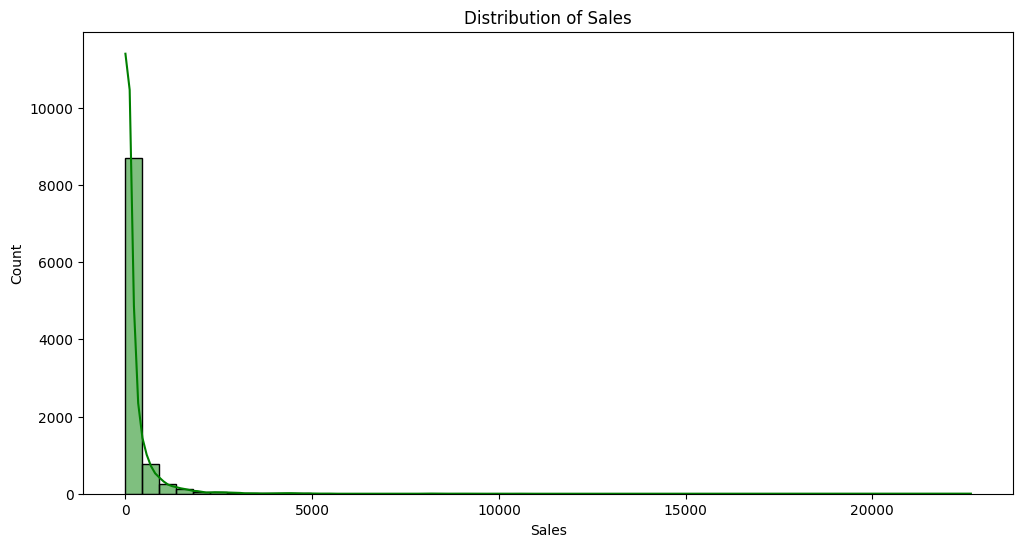

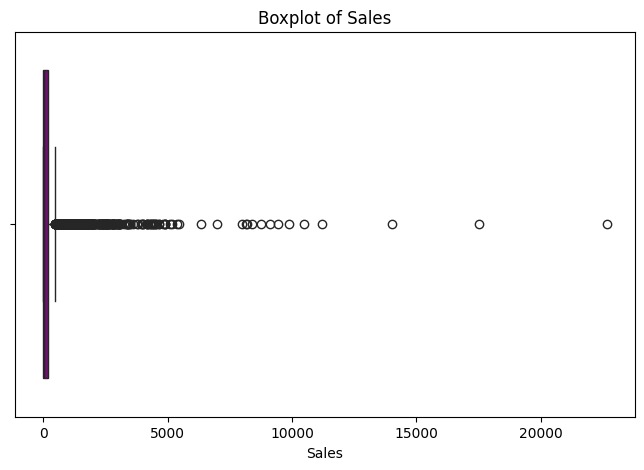

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True, color="green")
plt.title("Distribution of Sales")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sales'], color="purple")
plt.title("Boxplot of Sales")
plt.show()


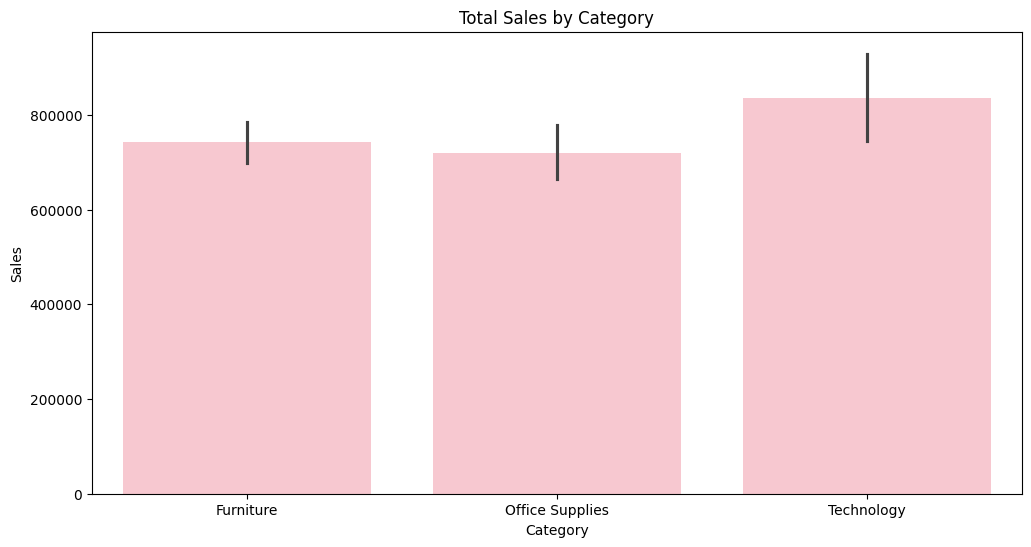

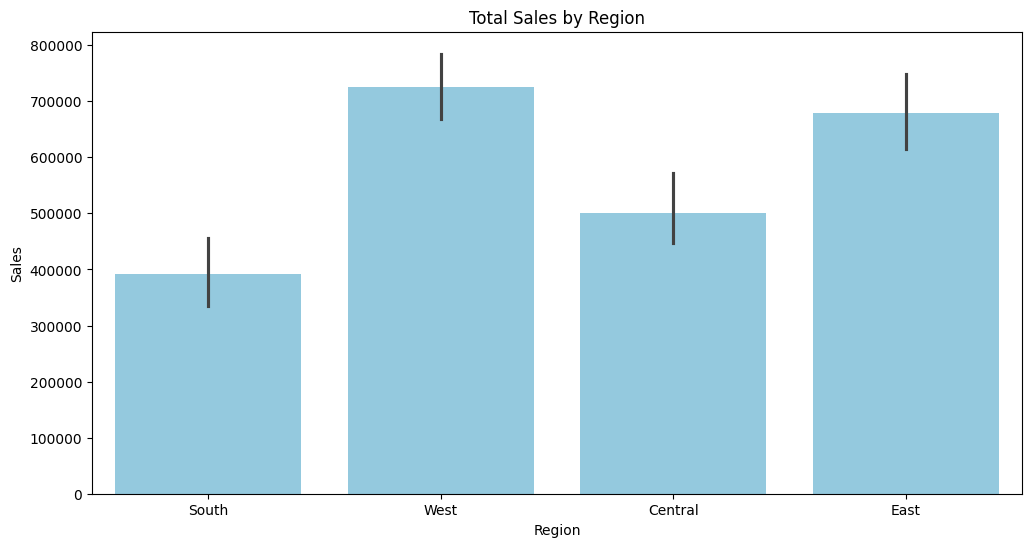

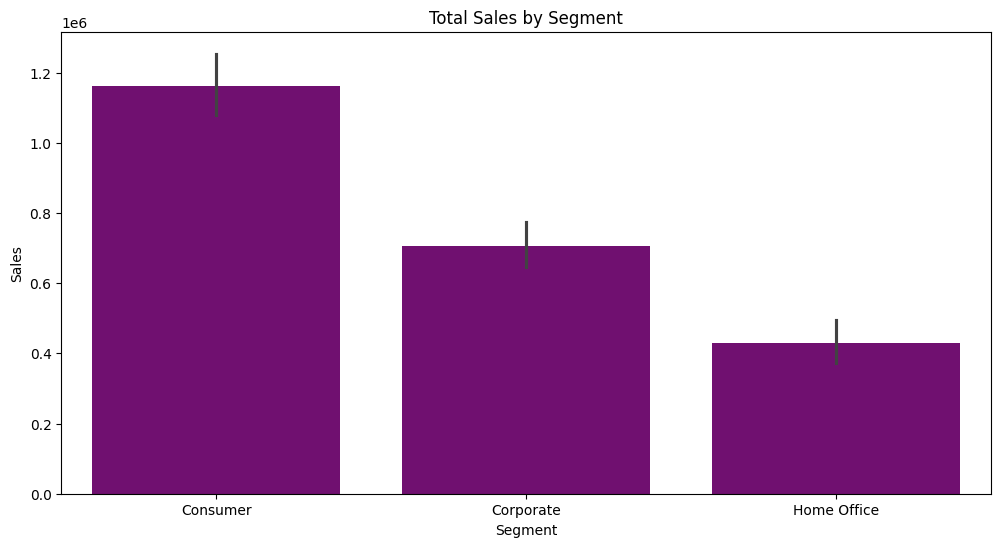

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=np.sum, color="pink")
plt.title("Total Sales by Category")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum, color="skyblue")
plt.title("Total Sales by Region")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=df, estimator=np.sum, color="purple")
plt.title("Total Sales by Segment")
plt.show()

In [ ]:
from scipy.stats import zscore
df['Sales_Zscore'] = zscore(df['Sales'])
outliers = df[np.abs(df['Sales_Zscore']) > 3]  # Sales values with Z-score > 3
print("Number of Outliers:", len(outliers))


Number of Outliers: 127


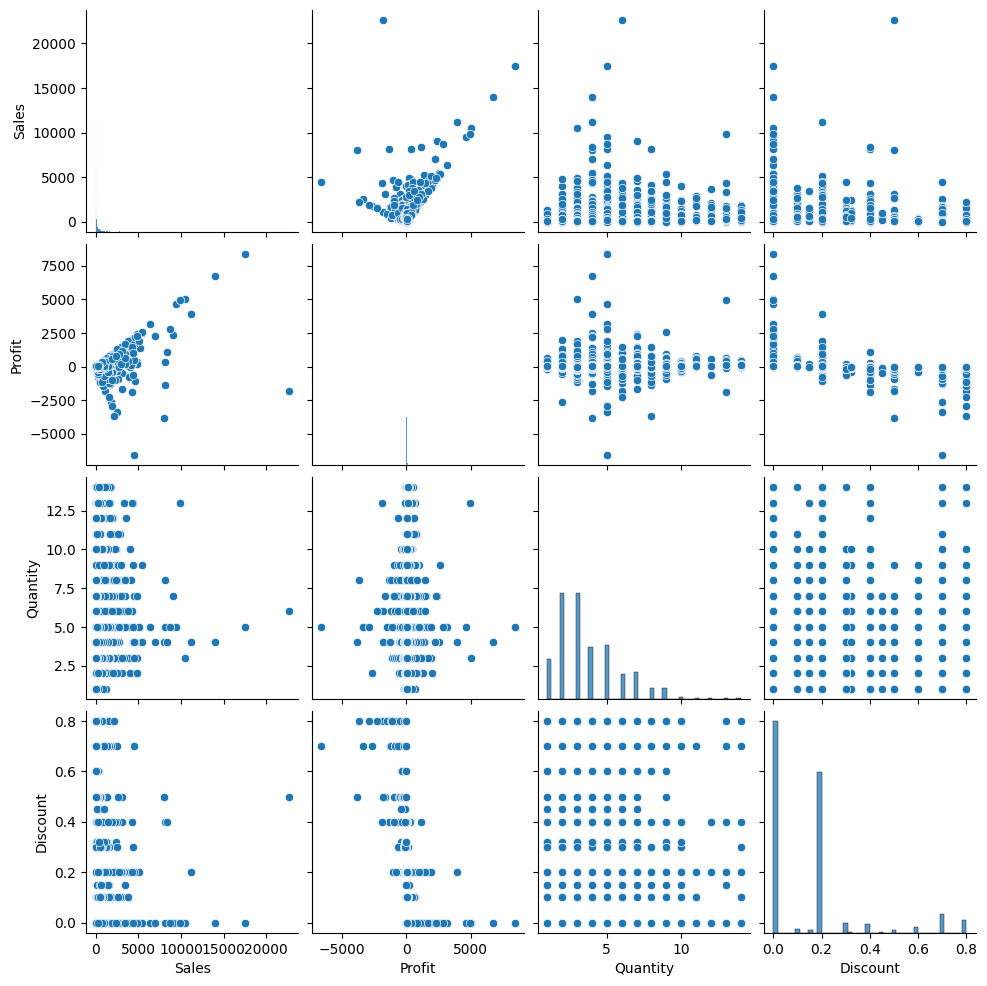

In [ ]:
import seaborn as sns
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.show()

  Order Date  Year  Month
0 2016-11-08  2016     11
1 2016-11-08  2016     11
2 2016-06-12  2016      6
3 2015-10-11  2015     10
4 2015-10-11  2015     10
            Row ID                     Order Date   Postal Code         Sales  \
count  9994.000000                           9994   9994.000000   9994.000000   
mean   4997.500000  2016-04-30 00:07:12.259355648  55190.379428    229.858001   
min       1.000000            2014-01-03 00:00:00   1040.000000      0.444000   
25%    2499.250000            2015-05-23 00:00:00  23223.000000     17.280000   
50%    4997.500000            2016-06-26 00:00:00  56430.500000     54.490000   
75%    7495.750000            2017-05-14 00:00:00  90008.000000    209.940000   
max    9994.000000            2017-12-30 00:00:00  99301.000000  22638.480000   
std    2885.163629                            NaN  32063.693350    623.245101   

          Quantity     Discount       Profit  Sales_Zscore         Year  \
count  9994.000000  9994.000000  9994.0

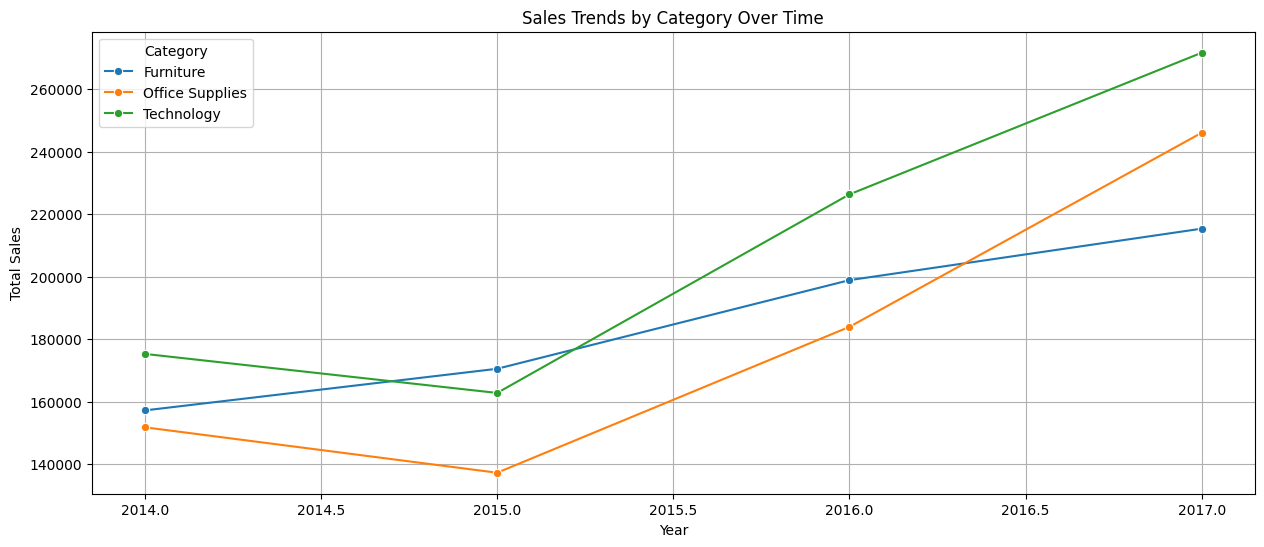

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract 'Year' and 'Month' from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Verify the conversion
print(df[['Order Date', 'Year', 'Month']].head())

# EDA: Summary statistics
print(df.describe())

# EDA: Check data types
print(df.info())

category_sales = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=category_sales, x='Year', y='Sales', hue='Category', marker="o")
plt.title("Sales Trends by Category Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

Data Cleaning

In [ ]:
Q1 = df['Sales'].quantile(0.25)  # First quartile
Q3 = df['Sales'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")


Number of Outliers: 1167


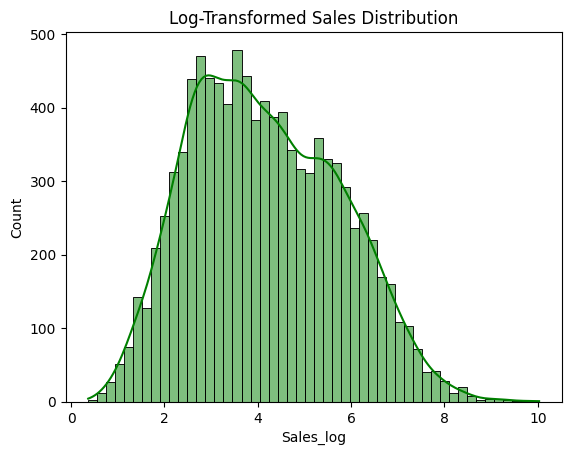

In [ ]:
df['Sales_log'] = np.log1p(df['Sales'])  # log1p avoids log(0)
sns.histplot(df['Sales_log'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Sales Distribution")
plt.show()


Feature Importance

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print(feature_importance)

Profit              0.817789
Discount            0.034642
Sub-Category        0.026778
Quantity            0.015756
Category            0.014489
Ship Date           0.013375
Product Name        0.011772
City                0.011733
Customer Name       0.011297
Postal Code         0.009700
Order Date_day      0.007993
State               0.005398
Order Date_month    0.004914
Month               0.003883
Year                0.002488
Region              0.002459
Segment             0.002016
Order Date_year     0.001856
Ship Mode           0.001662
Country             0.000000
dtype: float64


In [ ]:
from sklearn.feature_selection import RFE

selector = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
selector.fit(X_train_scaled, y_train)
selected_features = X_train_scaled.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Ship Date', 'Customer Name', 'City', 'Postal Code', 'Category',
       'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


Model Training

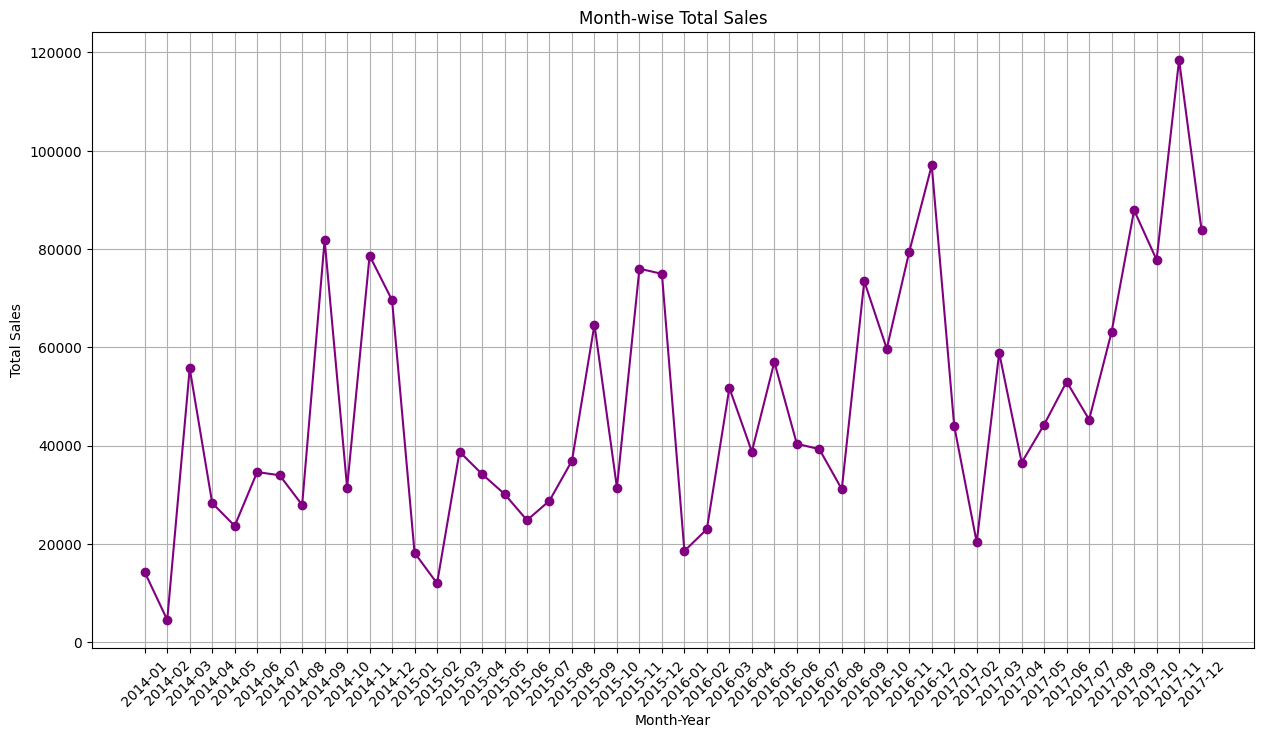


Random Forest Performance:
MAE: 73.29
RMSE: 418.28
R2 Score: 0.6817

Gradient Boosting Performance:
MAE: 91.31
RMSE: 413.63
R2 Score: 0.6887

XGBoost Performance:
MAE: 83.95
RMSE: 455.82
R2 Score: 0.6220


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv("Superstore - Sales Database.csv")

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Create a backup of the original dataset
df_original = df.copy()

# Extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year & Month and calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create 'Year-Month' column for visualization
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plot Month-wise Total Sales
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Month-wise Total Sales")
plt.grid(True)
plt.show()

# Define selected features
selected_features = ['Ship Date', 'Customer Name', 'City', 'Postal Code', 'Category',
                     'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit', 'Sales']

# Keep only the selected features
df = df[selected_features].copy()

# Feature Engineering - Product-Based Features
df['Avg_Product_Discount'] = df.groupby('Product Name')['Discount'].transform('mean')
df['Avg_Product_Profit'] = df.groupby('Product Name')['Profit'].transform('mean')

# Feature Engineering - Interaction Features
df['Profit_Margin'] = df['Profit'] / (df['Quantity'] * df['Discount'] + 1e-6)  # Avoid division by zero
df['Discount_Quantity_Interaction'] = df['Discount'] * df['Quantity']
df['Profit_per_Quantity'] = df['Profit'] / (df['Quantity'] + 1e-6)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert datetime columns to numerical features
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df.drop(columns=[col], inplace=True)

# Define target variable and features
target = 'Sales'
features = [col for col in df.columns if col != target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Identify numerical features for scaling
numerical_features = [col for col in X_train.columns if df[col].dtype in ['int64', 'float64']]

# Scale only numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Train and Evaluate Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Train and Evaluate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")

# Train and Evaluate XGBoost Regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "XGBoost")


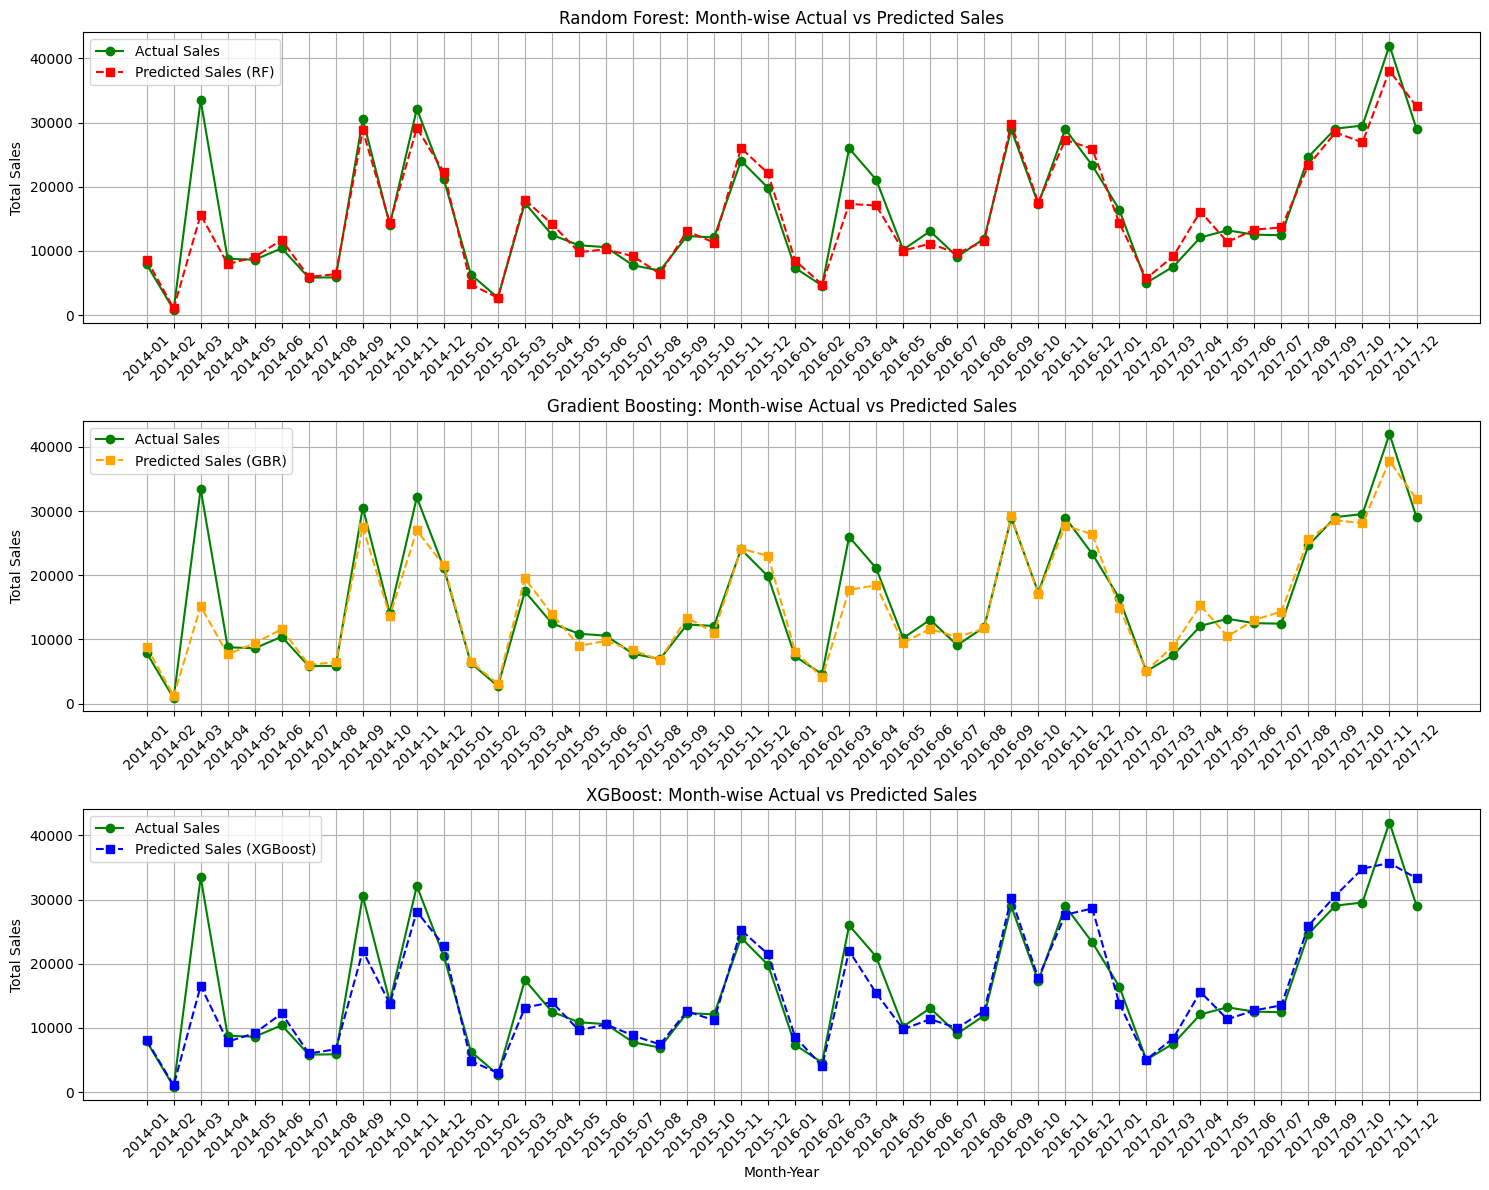

In [ ]:
# Restore 'Order Date' for actual vs predicted comparison
X_test_with_dates = X_test.copy()
X_test_with_dates['Sales'] = y_test
X_test_with_dates['Predicted_RF'] = y_pred_rf
X_test_with_dates['Predicted_GBR'] = y_pred_gbr
X_test_with_dates['Predicted_XGB'] = y_pred_xgb

# Retrieve 'Year' and 'Month' from original dataset
X_test_with_dates['Year'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.year
X_test_with_dates['Month'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.month

# Group by Year and Month
monthly_results = X_test_with_dates.groupby(['Year', 'Month'])[['Sales', 'Predicted_RF', 'Predicted_GBR', 'Predicted_XGB']].sum().reset_index()

# Create 'Year-Month' column for visualization
monthly_results['Year-Month'] = monthly_results['Year'].astype(str) + '-' + monthly_results['Month'].astype(str).str.zfill(2)

# Plot actual vs predicted sales
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_RF'], marker='s', linestyle='--', label="Predicted Sales (RF)", color='red')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Random Forest: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_GBR'], marker='s', linestyle='--', label="Predicted Sales (GBR)", color='orange')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Gradient Boosting: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_XGB'], marker='s', linestyle='--', label="Predicted Sales (XGBoost)", color='blue')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("XGBoost: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()